# 🌌 QFNN HyperTune Lab v3

Dynamic sweep + multi-seed + token-level inspection for Quantum Field Neural Network (QFNN).

In [1]:
# 🔧 Load modules
import torch
import matplotlib.pyplot as plt
import numpy as np
import random
from axiomatic_qfnn import AxiomaticQuantumField

In [2]:
# 📜 Text Input
text = "the cat sat on the mat and looked at the stars above in the vast sky"

In [3]:
# 🧪 Multi-Seed Dynamic Sweep Grid
phase_weights = [0.5, 1.0, 1.5]
hebb_lrs = [0.01, 0.02, 0.05]
num_seeds = 3

results = {}
for pw in phase_weights:
    for hlr in hebb_lrs:
        coherences = []
        for seed in range(num_seeds):
            torch.manual_seed(seed)
            np.random.seed(seed)
            random.seed(seed)
            config = {
                'η_0': 0.001,
                'phase_weight': pw,
                'radius_weight': 0.1,
                'hebb_lr': hlr,
                'hebb_decay': 0.995,
                'entropy_weight': 0.005,
                'diffusion_coef': 0.1,
                'step_size': 0.003,
                'steps': 300,
                'epsilon': 1e-8
            }
            model = AxiomaticQuantumField(config)
            field, history = model.evolve(text)
            coherences.append(history['coherence'][-1] if history['coherence'] else 0.0)
        key = (pw, hlr)
        results[key] = {
            'coherence_mean': np.mean(coherences),
            'coherence_std': np.std(coherences)
        }

[0] Loss: 14.0156 | Phase: 13.1526 | Entropy: 4.2662 | Coherence: 0.0230
[50] Loss: 20.2228 | Phase: 19.4559 | Entropy: 2.5837 | Coherence: 0.7651
[100] Loss: 21.4650 | Phase: 20.6517 | Entropy: 2.5837 | Coherence: 0.9662
⚡ Entropy shock at step 118 | β=3.19
[150] Loss: 21.6956 | Phase: 20.9343 | Entropy: 2.3864 | Coherence: 0.9705
[200] Loss: 21.0993 | Phase: 20.3586 | Entropy: 2.3865 | Coherence: 0.9844
⚡ Entropy shock at step 220 | β=10.86
[250] Loss: 20.4196 | Phase: 19.7559 | Entropy: 2.2025 | Coherence: 0.9615
[299] Loss: 20.5225 | Phase: 19.8555 | Entropy: 2.2025 | Coherence: 0.9734
[0] Loss: 14.0156 | Phase: 13.1526 | Entropy: 4.2662 | Coherence: 0.0230
[50] Loss: 20.2228 | Phase: 19.4559 | Entropy: 2.5837 | Coherence: 0.7651
[100] Loss: 21.4650 | Phase: 20.6517 | Entropy: 2.5837 | Coherence: 0.9662
⚡ Entropy shock at step 118 | β=3.19
[150] Loss: 21.8670 | Phase: 21.1391 | Entropy: 2.2599 | Coherence: 0.7166
[200] Loss: 20.8397 | Phase: 20.1455 | Entropy: 2.2598 | Coherence: 0

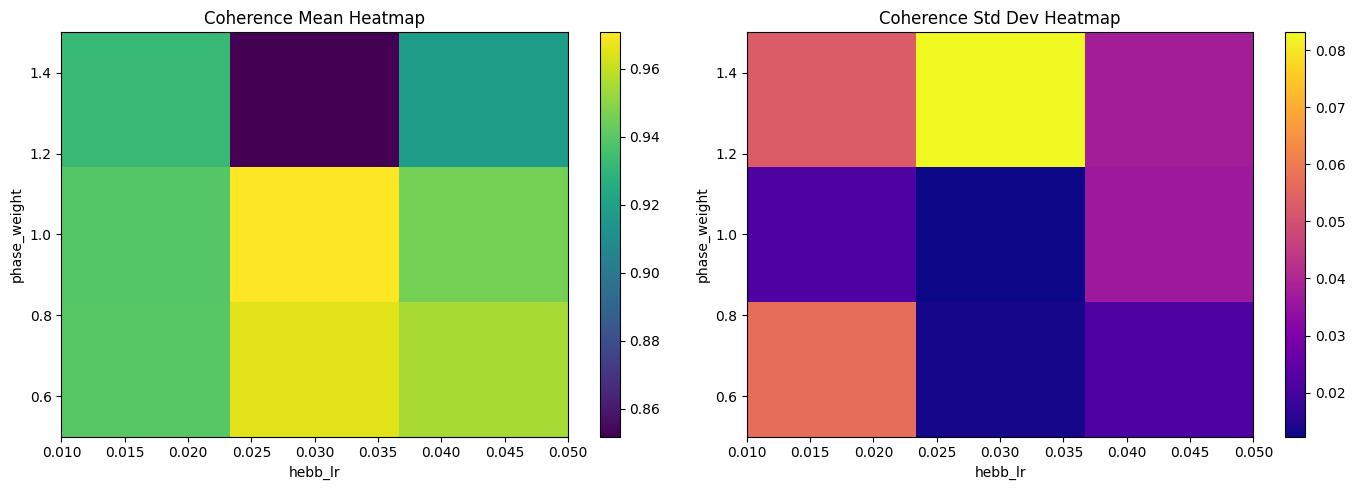

In [5]:
# 🔥 Sweep Result Visualization
Z = np.array([[results[(pw, hlr)]['coherence_mean'] for hlr in hebb_lrs] for pw in phase_weights])
Z_std = np.array([[results[(pw, hlr)]['coherence_std'] for hlr in hebb_lrs] for pw in phase_weights])

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

im0 = ax[0].imshow(Z, extent=[min(hebb_lrs), max(hebb_lrs), min(phase_weights), max(phase_weights)],
           origin='lower', aspect='auto', cmap='viridis')
ax[0].set_title('Coherence Mean Heatmap')
ax[0].set_xlabel('hebb_lr')
ax[0].set_ylabel('phase_weight')
fig.colorbar(im0, ax=ax[0])

im1 = ax[1].imshow(Z_std, extent=[min(hebb_lrs), max(hebb_lrs), min(phase_weights), max(phase_weights)],
           origin='lower', aspect='auto', cmap='plasma')
ax[1].set_title('Coherence Std Dev Heatmap')
ax[1].set_xlabel('hebb_lr')
ax[1].set_ylabel('phase_weight')
fig.colorbar(im1, ax=ax[1])

plt.tight_layout()
plt.show()